In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import  pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler

from ucimlrepo import fetch_ucirepo


In [46]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
#print(predict_students_dropout_and_academic_success.variables) 

df = predict_students_dropout_and_academic_success.data.features 

y = predict_students_dropout_and_academic_success.data.targets
y = y.Target.apply(lambda x: 1 if x == 'Dropout' else 0)

df['Dropout'] = y

df = df[['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date',
       'International', 'Unemployment rate',
       'Inflation rate', 'GDP', 
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 
       'Scholarship holder', 'Age at enrollment', 'Gender','Dropout']]

labels = df.columns
df

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Admission grade,Displaced,...,Inflation rate,GDP,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Scholarship holder,Age at enrollment,Gender,Dropout
0,1,17,5,171,1,1,122.0,1,127.3,1,...,1.4,1.74,19,12,5,9,0,20,1,1
1,1,15,1,9254,1,1,160.0,1,142.5,1,...,-0.3,0.79,1,3,3,3,0,19,1,0
2,1,1,5,9070,1,1,122.0,1,124.8,1,...,1.4,1.74,37,37,9,9,0,19,1,1
3,1,17,2,9773,1,1,122.0,1,119.6,1,...,-0.8,-3.12,38,37,5,3,0,20,0,0
4,2,39,1,8014,0,1,100.0,1,141.5,0,...,-0.3,0.79,37,38,9,9,0,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,122.2,0,...,2.8,-4.06,1,1,5,4,0,19,1,0
4420,1,1,2,9773,1,1,120.0,105,119.0,1,...,0.6,2.02,1,1,9,9,0,18,0,1
4421,1,1,1,9500,1,1,154.0,1,149.5,1,...,-0.3,0.79,37,37,9,9,1,30,0,1
4422,1,1,1,9147,1,1,180.0,1,153.8,1,...,-0.8,-3.12,37,37,7,4,1,20,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital Status                  4424 non-null   int64  
 1   Application mode                4424 non-null   int64  
 2   Application order               4424 non-null   int64  
 3   Course                          4424 non-null   int64  
 4   Daytime/evening attendance      4424 non-null   int64  
 5   Previous qualification          4424 non-null   int64  
 6   Previous qualification (grade)  4424 non-null   float64
 7   Nacionality                     4424 non-null   int64  
 8   Admission grade                 4424 non-null   float64
 9   Displaced                       4424 non-null   int64  
 10  Educational special needs       4424 non-null   int64  
 11  Debtor                          4424 non-null   int64  
 12  Tuition fees up to date         44

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.0,1.00,1.00,6.00
Application mode,4424.0,18.669078,17.484682,1.00,1.0,17.00,39.00,57.00
Application order,4424.0,1.727848,1.313793,0.00,1.0,1.00,2.00,9.00
Course,4424.0,8856.642631,2063.566416,33.00,9085.0,9238.00,9556.00,9991.00
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.0,1.00,1.00,1.00
Previous qualification,4424.0,4.577758,10.216592,1.00,1.0,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.0,133.10,140.00,190.00
Nacionality,4424.0,1.873192,6.914514,1.00,1.0,1.00,1.00,109.00
Admission grade,4424.0,126.978119,14.482001,95.00,117.9,126.10,134.80,190.00
Displaced,4424.0,0.548373,0.497711,0.00,0.0,1.00,1.00,1.00


In [35]:
predict_students_dropout_and_academic_success.variables[['name', 'description']]

,name,description
0,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...
1,Application mode,1 - 1st phase - general contingent 2 - Ordinan...
2,Application order,Application order (between 0 - first choice; a...
3,Course,33 - Biofuel Production Technologies 171 - Ani...
4,Daytime/evening attendance,1 – daytime 0 - evening
5,Previous qualification,1 - Secondary education 2 - Higher education -...
6,Previous qualification (grade),Grade of previous qualification (between 0 and...
7,Nacionality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...
8,Mother's qualification,1 - Secondary Education - 12th Year of Schooli...
9,Father's qualification,1 - Secondary Education - 12th Year of Schooli...


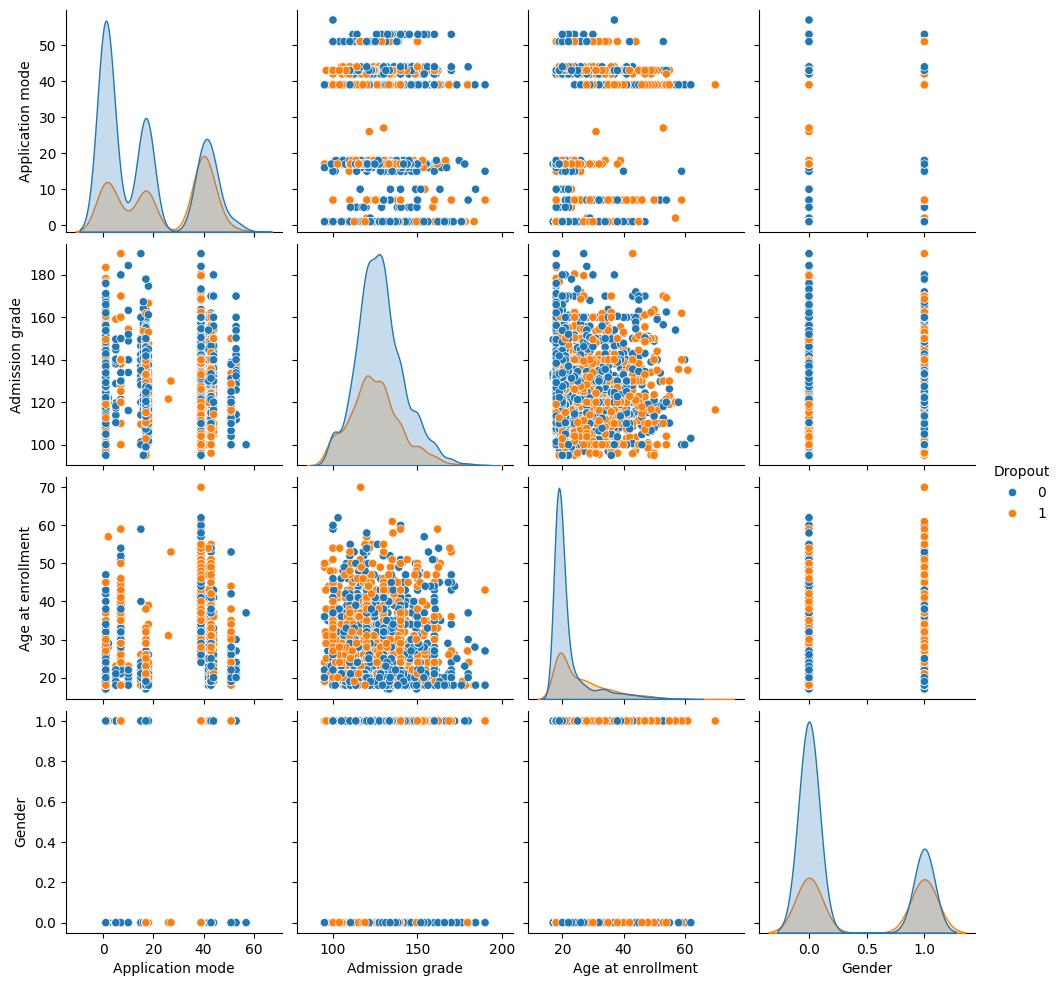

In [52]:
things = ['Application mode', 'Admission grade', 'Age at enrollment', 'Gender']

sns.pairplot(data= df, x_vars=things, y_vars=things, hue='Dropout', diag_kind='kde');

In [40]:
def corr_mat(X):
    '''The code is adapted from solution to data debias exercises
    Takes a dataframe and computes the pearsons correlations, and their 
    statistical significance between all features,
    returning 2 arrays: correlations, and p_values'''
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Compute correlation matrix
    n_features = X.shape[1]

    corr_ = np.zeros((n_features, n_features))
    p_ = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(n_features):
            corr_[i,j], p_[i,j] = pearsonr(X[:,i], X[:,j])
            corr_ = np.nan_to_num(corr_, 0)
            # Handle NaN values in correlation coefficient by setting p-value to 1
            if np.isnan(corr_[i,j]):
                p_[i,j] = 1

    return corr_, p_

def corr_mat_spear(X):
    '''The code is adapted from solution to data debias exercises
    Takes a dataframe and computes the pearsons correlations, and their 
    statistical significance between all features,
    returning 2 arrays: correlations, and p_values'''
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Compute correlation matrix
    n_features = X.shape[1]

    corr_ = np.zeros((n_features, n_features))
    p_ = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(n_features):
            corr_[i,j], p_[i,j] = spearmanr(X[:,i], X[:,j])
            corr_ = np.nan_to_num(corr_, 0)
            # Handle NaN values in correlation coefficient by setting p-value to 1
            if np.isnan(corr_[i,j]):
                p_[i,j] = 1

    return corr_, p_

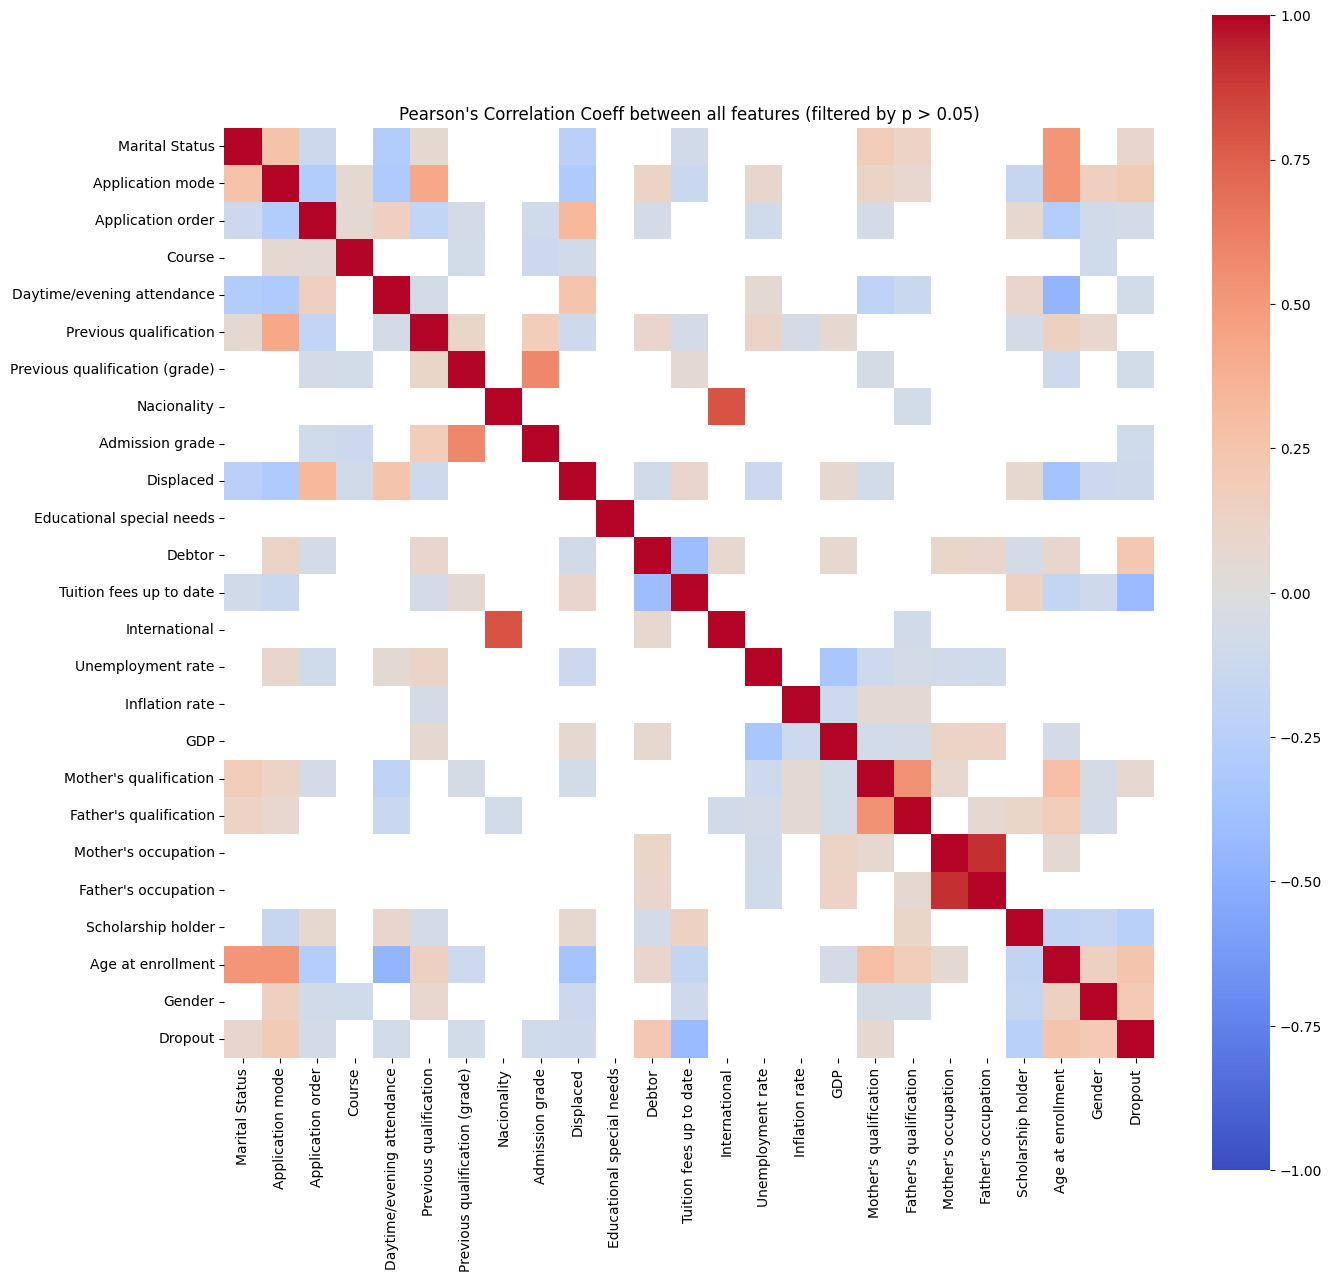

In [53]:
corr, p = corr_mat(df)

alpha = 0.05 # Significance level
corrected_alpha = alpha / (df.shape[1]**2/2) #bonferronni correction,

plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="coolwarm",
            xticklabels=df.columns, yticklabels=df.columns,
            square=True, vmin=-1, vmax=1, mask= p > corrected_alpha)

plt.title(f"Pearson's Correlation Coeff between all features (filtered by p > {alpha})")
plt.show()